In [ ]:
# Glaciers Stats
# Senior Design Spring 2022


In [15]:
# libs
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import os
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output
import shutil
import random
from random import randrange
import time
from IPython.display import Image, display, clear_output
from pylab import *
#import rasterstats 
import pandas as pd
import skimage
from sklearn.model_selection import train_test_split



import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D


In [16]:
# replace path name to your directory that has all_tiles_april
tile_dir = "./data/tiles/"
file_list = os.listdir(tile_dir)
#file_list.sort()

np.random.shuffle(file_list)

# source path 
source = './data/tiles/'

# creating empty lists for feature data 

feature_data=[]
target_data = []

6bd050c5189eb28a58b92f32f9189ab41ed1c11df92890a9493c50e99b7e8af6.tif


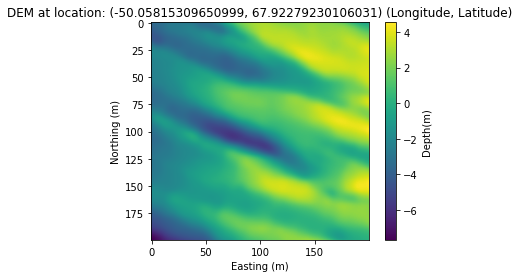

In [17]:
###### display images from the crevasses folder 

tile_dir = "./data/sorted/crevasse/"
file_list = os.listdir(tile_dir)

 # step 2 sets new tile
    
tile = file_list[8] # 8 is pretty good, 22 is prez ex 21 maybe..
    # produces tile
sample_crev = rio.open(tile_dir + tile)

print(tile)

coords = sample_crev.lnglat() # sets coordinates of image

plt.imshow(sample_crev.read().reshape((200,200)),cmap='viridis')


plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')


plt.show()

In [18]:
#from skimage.filters import prewitt,difference_of_gaussians,roberts, sobel
from skimage.feature import canny


# feature data 
tile_dir = "./data/sorted/crevasse/"
file_list = os.listdir(tile_dir)

for file in range(0,len(file_list)):


 # step 2 sets new tile
    
    tile = file_list[file] 
    # produces tile
    sample_crev = rio.open(tile_dir + tile)


    sample_crev = sample_crev.read().reshape((200,200))
    #sample_crev= canny(sample_crev, sigma=5)

    for x in range(0,len(sample_crev)):
        for y in range(0, len(sample_crev[x])):
            if sample_crev[x][y] > np.average(sample_crev) - 1.96 * np.std(sample_crev):   # gaussian 95% confidence interval equation, lower bound  
                sample_crev[x][y] =0 
    feature_data.append(sample_crev)
    target_data.append(1)
    


    
# discard data 
tile_dir = "./data/sorted/discard/"
file_list = os.listdir(tile_dir)

for file in range(0,69):


 # step 2 sets new tile
    randnum = randrange(len(file_list))
    tile = file_list[randnum] 
    # produces tile
    sample_discard = rio.open(tile_dir + tile)


    sample_discard = sample_discard.read().reshape((200,200))
    #sample_discard = canny(sample_discard, sigma=5)

    for x in range(0,len(sample_discard)):
        for y in range(0, len(sample_discard[x])):
            if sample_discard[x][y] > np.average(sample_discard) - 1.96 * np.std(sample_discard):   # gaussian 95% confidence interval equation, lower bound  
                sample_discard[x][y] =0 
    feature_data.append(sample_discard)
    target_data.append(0)
    


In [19]:
feature_data = np.array(feature_data)
feature_data.shape

target_data = np.array(target_data)
target_data.shape



(100,)

In [20]:


X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data,test_size=0.3)

print(y_test)

[0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [21]:
cnn_layers = [Input(shape = (200,200,1)),
              Conv2D(64,3,padding = 'same',activation='relu'),

              MaxPool2D(),

              Conv2D(128,3,padding = 'same',activation= 'relu'),

              MaxPool2D(),
              
              Conv2D(256,3,padding = 'same',activation= 'relu'),

              MaxPool2D()
              
              ]
cnn_layers.append(Flatten())
cnn_layers.append(Dense(2,activation='softmax'))

cnn_model = Sequential(cnn_layers)


#raise NotImplementedError()

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 256)     

Epoch 1/7
3/3 [==============================] - 3s 814ms/step - loss: 0.8559 - accuracy: 0.3857 - val_loss: 0.6344 - val_accuracy: 0.8333
Epoch 2/7
3/3 [==============================] - 3s 740ms/step - loss: 0.5502 - accuracy: 0.9143 - val_loss: 0.6379 - val_accuracy: 0.7667
Epoch 3/7
3/3 [==============================] - 3s 769ms/step - loss: 0.4485 - accuracy: 0.9000 - val_loss: 0.8133 - val_accuracy: 0.7667
Epoch 4/7
3/3 [==============================] - 2s 687ms/step - loss: 0.3298 - accuracy: 0.8571 - val_loss: 0.6569 - val_accuracy: 0.8000
Epoch 5/7
3/3 [==============================] - 2s 692ms/step - loss: 0.3970 - accuracy: 0.8429 - val_loss: 0.5380 - val_accuracy: 0.8667
Epoch 6/7
3/3 [==============================] - 2s 687ms/step - loss: 0.1479 - accuracy: 0.9714 - val_loss: 0.7150 - val_accuracy: 0.8667
Epoch 7/7
3/3 [==============================] - 2s 684ms/step - loss: 0.1192 - accuracy: 0.9571 - val_loss: 0.6354 - val_accuracy: 0.8667

Accuracy on the final epoc

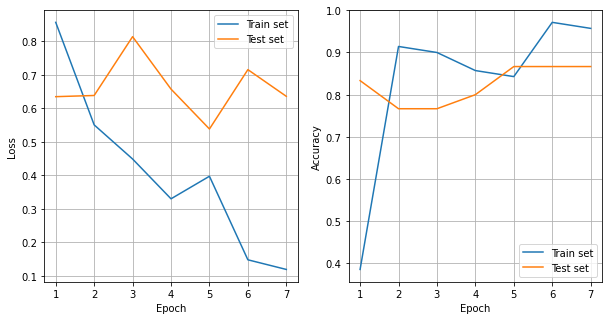

In [22]:
cnn_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
n_epochs = 7
history = cnn_model.fit(X_train.reshape(-1, 200, 200 ,1), y_train, epochs=n_epochs,
                        validation_data=(X_test.reshape(-1, 200, 200 ,1), y_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_loss'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_epochs+1), history.history['accuracy'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_accuracy'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
print(f"\nAccuracy on the final epoch of training was {100*history.history['accuracy'][-1]:0.2f}%")

In [23]:
# Let's assess our CNN model's performance on the test set
cnn_scores = cnn_model.evaluate(X_test.reshape(-1, 200, 200 ,1), y_test)

print(f"\nThe CNN model achieves an accuracy of {cnn_scores[1]*100:.2f}% on the test data.")

1/1 [==============================] - 0s 271ms/step - loss: 0.6354 - accuracy: 0.8667

The CNN model achieves an accuracy of 86.67% on the test data.


[0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


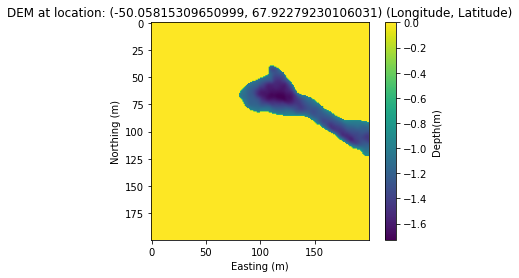

0


In [54]:
print(y_test)
sample_crev = X_test[14]


plt.imshow(sample_crev,cmap = 'viridis')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')


plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.show()


cnn_class_probabilities = cnn_model.predict(sample_crev.reshape(-1, 200, 200, 1))

cnn_class_prediction = np.argmax(cnn_class_probabilities)

print(cnn_class_prediction)

In [ ]:
plt.imshow(sample_crev)

6bd050c5189eb28a58b92f32f9189ab41ed1c11df92890a9493c50e99b7e8af6.tif


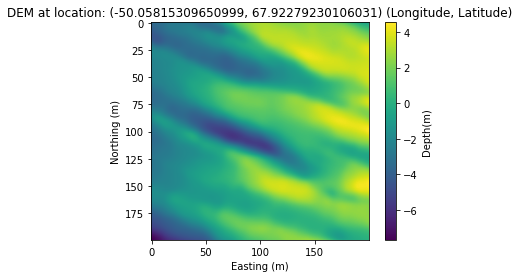

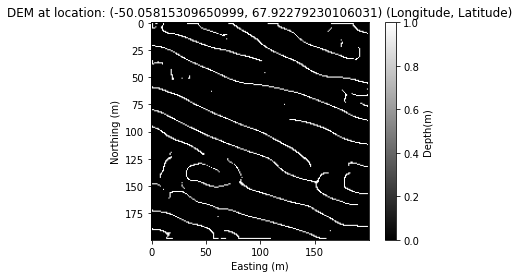

In [29]:
###### display images from the crevasses folder 

tile_dir = "./data/sorted/crevasse/"
file_list = os.listdir(tile_dir)

 # step 2 sets new tile
    
tile = file_list[8] # 8 is pretty good, 22 is prez ex 21 maybe..
    # produces tile
sample_crev = rio.open(tile_dir + tile)

print(tile)

coords = sample_crev.lnglat() # sets coordinates of image

plt.imshow(sample_crev.read().reshape((200,200)),cmap='viridis')


plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')


plt.show()

sample_crev=sample_crev.read().reshape((200,200))
crev_edge=canny(sample_crev,sigma=5)

plt.imshow(crev_edge,cmap='gray')
plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')

plt.show()

False


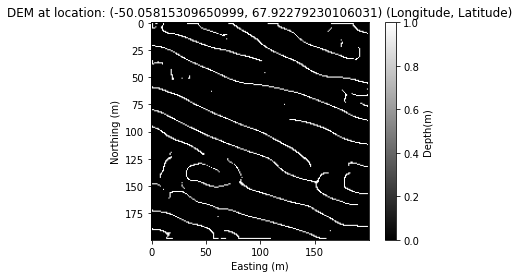

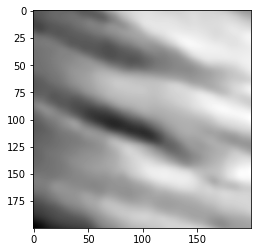

In [30]:
###
crev_edge=canny(sample_crev,sigma=5)
print(crev_edge[48][199])
plt.imshow(crev_edge,cmap='gray')
plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')

plt.show()


plt.imshow(sample_crev,cmap = 'gray')
plt.show()



In [ ]:
### ML TIME 

# create feature data 


In [ ]:
### Everything below this is irrelvant 

In [31]:
shade = False
counter = 0

for x in range (0,len(crev_edge)):
    counter = 0
    shade = False
    for y in range(0,len(crev_edge[x])):
        if crev_edge[x][y] == True and (counter == 0 or counter >1 ):
            shade = not shade 
        if shade:
            counter += 1
            crev_edge[x][y] = True




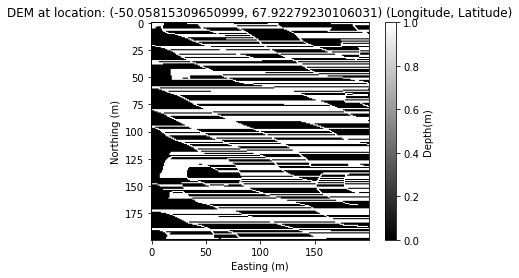

In [32]:
plt.imshow(crev_edge,cmap='gray')
plt.title("DEM at location: " + str(coords) + " (Longitude, Latitude)")
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

cbar = plt.colorbar()
cbar.set_label('Depth(m)')

plt.show()

In [ ]:
### Creation of Pandas Data Frame 
def df_maker(tile_dir,file_list):

    tile_df = pd.DataFrame(columns=['File_Name','Longitude','Latitude','Elev_min','Elev_max','Elev_std','Elev_range'])
    for tile in file_list:
        current_tile = rio.open(tile_dir + tile)
        longitude= current_tile.lnglat()[0]
        latitude= current_tile.lnglat()[1]
        current_tile = current_tile.read().reshape((200,200))
        #print(current_tile.max())
        tile_df = tile_df.append({'File_Name': tile,'Longitude':longitude,'Latitude': latitude,'Elev_min': np.min(current_tile),'Elev_max': np.max(current_tile),'Elev_std': np.std(current_tile),'Elev_range':(np.max(current_tile) - np.min(current_tile))},ignore_index=True)
    return tile_df
    

In [ ]:
tile_df.tail()

In [ ]:
full_set_tile_dir = "./data//sorted/discard/"
full_set_file_list = os.listdir(full_set_tile_dir)
full_set_file_list=full_set_file_list[0:69]

fulldf = df_maker(full_set_tile_dir,full_set_file_list)
fulldf.tail()

In [ ]:
crev_cat= []
for index,row in tile_df.iterrows():
    if row['Elev_min'] <= -1.5:
        if row['Elev_range'] >= 3 and row['Elev_range'] <= 20:
            crev_cat.append(1)
        else: crev_cat.append(0)
    else: crev_cat.append(0)
tile_df['Crev_cat'] = crev_cat
    

In [ ]:
tile_df.head()

In [ ]:
tile_df[tile_df['Crev_cat']==0]